## 1. Introduction

---

Name : Ogi Hadicahyo

Link Hugging Face: <a href="https://huggingface.co/spaces/OgiHadicahyo/Default_Credit_Card"> Hugging Face</a>.

---

**Background**

 I found data on Google Cloud which contains a dataset about credit_card_default. I realized that this dataset was very interesting because with this data, I could create a machine learning model with a classification method to predict the possibility of whether someone would be able to provide credit or not based on existing data. Therefore, I decided to create a Machine Learning model to predict the possibility of an employee being able to pay credit or not by implementing SVM, KNN, and Logistic Regression and determining hyperparameters using Scikit-Learn

**Problem Statement**

Create a predictive machine learning model using SVM, KNN, and Logistic Regression and find out which model is best for predicting the possibility of someone being able to pay credit or not later. This model is useful for credit card service providers to be able to take further steps in determining whether to give a credit card to someone

**Dataset**
- Link Dataset: <a href="https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&pli=1&project=hacktive8-408704&ws=!1m9!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m3!8m2!1s805845835069!2s5fed4d090c56455390a4def8abaf5adb"> Google Cloud</a>.
- Title : P1G5_Set_1_Ogi-Hadicahyo.csv (credit_card_default dataset)

| Column | Description |
| --- | --- |
| id | Anonymized ID of each client |	
| limit_balance |	Amount of given credit in NT dollars (includes individual and family/supplementary credit) |	
| sex | Gender (1=male, 2=female) |	
| education_level | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) |	
| marital_status | Marital status (1=married, 2=single, 3=others) |	
| age | Age in years |	
| pay_0 | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) |
| pay_2 | Repayment status in August, 2005 (scale same as above) |	
| pay_3 | Repayment status in July, 2005 (scale same as above) |	
| pay_4 | Repayment status in June, 2005 (scale same as above) |	
| pay_5 | Repayment status in May, 2005 (scale same as above) |	
| pay_6 | Repayment status in April, 2005 (scale same as above) |	
| bill_amt_1 | Amount of bill statement in September 2005 (NT dollar) |	
| bill_amt_2 | Amount of bill statement in August 2005 (NT dollar) |	
| bill_amt_3 | Amount of bill statement in July 2005 (NT dollar)	|
| bill_amt_4 | Amount of bill statement in June 2005 (NT dollar) |	
| bill_amt_5 | Amount of bill statement in May 2005 (NT dollar) |	
| bill_amt_6 | Amount of bill statement in April 2005 (NT dollar) |	
| pay_amt_1 | Amount of previous payment in September 2005 (NT dollar) |	
| pay_amt_2 | Amount of previous payment in August 2005 (NT dollar) |	
| pay_amt_3 | Amount of previous payment in July 2005 (NT dollar) |	
| pay_amt_4 | Amount of previous payment in June 2005 (NT dollar) |	
| pay_amt_5 | Amount of previous payment in May 2005 (NT dollar)	|
| pay_amt_6 | Amount of previous payment in April 2005 (NT dollar) |	
| default_payment_next_month | Default payment (1=yes, 0=no) |

## 2. Query SQL

```sql
SELECT 
    limit_balance,
    CAST(sex AS INT) AS sex,
    CAST(education_level AS INT) AS education_level,
    CAST(marital_status AS INT) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1, 
    pay_amt_2, 
    pay_amt_3, 
    pay_amt_4, 
    pay_amt_5, 
    pay_amt_6, 
    CAST(default_payment_next_month AS INT) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 24012;
```

CAST(CUST_ID AS INT) AS CUST_ID,
BALANCE,
BALANCE_FREQUENCY,
PURCHASES,
ONEOFF_PURCHASES,
INSTALLMENTS_PURCHASES,
CASH_ADVANCE,
PURCHASES_FREQUENCY,
ONEOFF_PURCHASES_FREQUENCY,
PURCHASES_INSTALLMENTS_FREQUENCY,
CASH_ADVANCE_FREQUENCY,
CAST(CASH_ADVANCE_TRX AS INT) AS CASH_ADVANCE_TRX, 
CAST(PURCHASES_TRX AS INT) AS PURCHASES_TRX,
CREDIT_LIMIT,
PAYMENTS,
MINIMUM_PAYMENTS,
PRC_FULL_PAYMENT,
CAST(TENURE AS INT) AS TENURE

## 3. Import Libraries

The first step that needs to be done is ***import libraries***. ***Importing libraries*** makes it easier to reuse code, simplify complex tasks, organize code into smaller parts, use optimal and reliable solutions, and ensure consistency and compatibility across projects and programming languages.

In [273]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from scipy import stats
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler

#library for Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Library For Model Evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

#library untuk model saving
import pickle

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

We have finished importing libraries. Now, we can use these libraries to process the data we have. The next step is data loading

## 4. Data Loading

The data used is default credit card data obtained from Google BigQuery and then saved in CSV form with the file name P1G5_Set_1_Ogi-Hadicahyo.csv. First of all, we're gonna import the data set .csv file containing the dataset into a Data Frame

In [274]:
# Load the .csv file
data = pd.read_csv('P1G5_Set_1_Ogi-Hadicahyo.csv')

---
### 4.1 Data Information

We will see a small overview of the dataset we have by displaying the first and last 10 rows. This step is carried out to be able to understand the contents of the dataset that we have

In [275]:
# Show the first 10 data
print('The first 10 rows data:')
display(data.head(10))

# Show the last 10 data
print('The last 10 rows data:')
display(data.tail(10))

The first 10 rows data:


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,...,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


The last 10 rows data:


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2956,100000,1,3,1,40,0,0,-1,-1,-2,...,0,0,0,2000,2377,40000,0,0,0,0
2957,30000,2,3,1,48,1,-1,-1,-2,-2,...,0,0,0,200,0,0,0,0,0,0
2958,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2959,20000,1,3,2,26,-1,-1,-1,-2,-2,...,0,0,0,1560,0,0,0,0,0,0
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
2964,290000,2,2,1,39,1,-2,-2,-2,-2,...,3184,390,390,10000,800,3184,390,390,6617,0


The table above is the first and last 10 rows of the dataset that we will use. Now, we will look in more detail about our dataset by displaying a summary of the dataset

In [276]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Based on the information above, it can be seen that this dataset has ***2965 entries*** with ***24 columns***. Apart from that, all columns in this dataset are of ***numeric data type (float and integer)***. In the output above it can also be stated that there are no missing values in this dataset because the number of rows in each column is 2965. Therefore, we no longer need to handle missing values later. However, we still need to check whether there is duplicate data in this dataset so that the data can be used more optimally

In [277]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 24
Number of columns of type float: 0
Number of columns of type object: 0


Based on the observations above, the dataset we have consists of ***20 float columns*** and ***4 integer columns***. This dataset does not have columns of type object so we can conclude that all columns have values of numeric type

---
### 4.2 Make Adjustments to Existing Data

Data adjustments are carried out to optimize the data we have. The data adjustment process goes through three stages, namely checking for duplicate data, renaming columns, and combining data. Duplicate data checks are carried out to avoid the presence of the same data in the dataset, this is done to prevent the model from learning the same data at the model training stage. renaming columns and combining data is done because in the dataset that we have, there are column names that do not match and it is known that there are also columns that have the same values, so we will combine the data so that the data used is not complex.

#### 4.2.1 Check For Duplicate Data

In [278]:
# Counting the amount of data that is potentially the same as other data
data.duplicated().sum()

1

As a result of calculating the amount of data that is potentially the same as other data, it is known that there is one data that is the same as other data. Therefore, we will delete the data because we already have one data that has that information

In [279]:
# Delete duplicate data
data = data.drop_duplicates()

# Check again whether there is still data that has the potential to be the same as other data
data.duplicated().sum()

0

we have deleted duplicate data and the data can be used for further processing. Now, the number of entries in our dataset is 2964 data.

#### 4.3.2 Rename Column

pay_0 column is Repayment status in September, 2005 (payment status in the first month). We will change the column name to pay_1 because pay_0 contains the payment status for the first month

In [280]:
# Changed column name 'pay_0' to 'pay_1'
data.rename(columns={'pay_0': 'pay_1'}, inplace=True)

# Displays the first 5 rows of data in the dataset
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0


We have finished adjusting the column names. It can be seen from the table above that the pay_0 column has changed its name to pay_1

#### 4.3.3 Combining Data

Based on information from the website , it can be seen that labels 5 and 6 in education_level have the value 'unknown. Apart from that, the identity of label 0 is not explained. Therefore, these three labels will be considered as other labels so the label value will be changed to '4'. Label '4' is a label with category 'other'

In [281]:
# Changing the label value of the 'education_level' column
data['education_level'] = data['education_level'].replace(0, 4)
data['education_level'] = data['education_level'].replace(5, 4)
data['education_level'] = data['education_level'].replace(6, 4)

# Displays unique values in the 'education_level' column
data['education_level'].unique()

array([4, 1, 2, 3], dtype=int64)

## 5. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data Exploration process

In [282]:
# copy dataframe for visualization
data_visualization = data.copy()

Done!! Let's Continue to the visualization process.

### 5.1 Data distribution based on default payment status

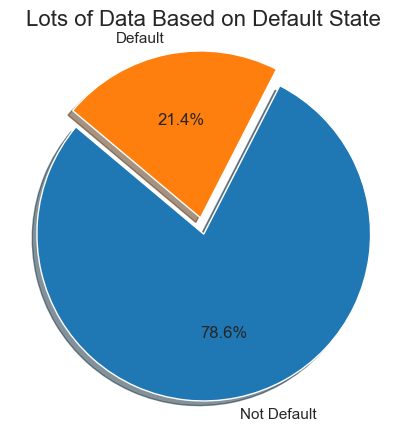

In [283]:
# Create data for pie charts
labels = ['Not Default', 'Default']
sizes = data_visualization['default_payment_next_month'].value_counts()
colors = ['#1f77b4', '#ff7f0e'] # Darker color palette
explode = (0.1, 0) # Break the first chunk (No Default)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title("Lots of Data Based on Default State", fontsize=16)

# Displays a pie chart
plt.axis('equal') # Set the aspect ratio to be a circle
plt.show()

From the information obtained from the dataset source, we find that 0 represents those who have not experienced a default payment and 1 represents those who have default payment status.

From the visualization above, we know that the number of people who do not experience default payments (arrears/failed to pay) is greater than those who default, namely the ratio is 78.58% : 21.42%

### 5.2 Visualization of the sex column with default_payment_next_month

<Figure size 1000x600 with 0 Axes>

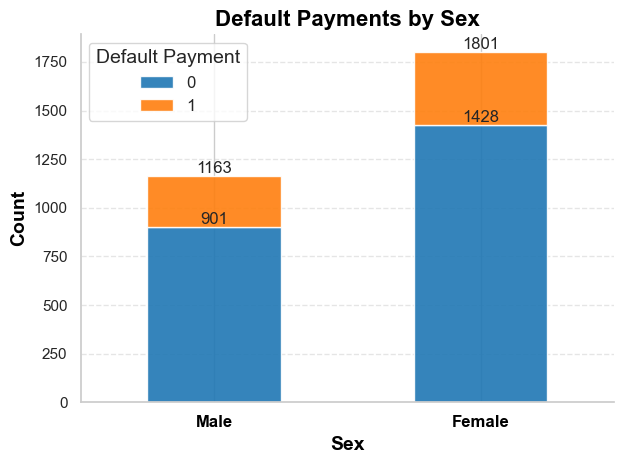

In [284]:
# Menghitung jumlah default dan non-default payment untuk setiap kombinasi 'sex' dan 'default_payment_next_month'
sexCount = data_visualization.groupby(['sex', 'default_payment_next_month']).size().unstack()

# Membuat bar plot menggunakan seaborn untuk memvisualisasikan jumlah default dan non-default payment berdasarkan 'sex'
plt.figure(figsize=(10, 6))
ax = sexCount.plot(kind='bar', stacked=True, alpha=0.9, color=['#1f77b4', '#ff7f0e'])

# Menambahkan label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Menambahkan label di pinggir bar

# Mengatur judul barchart, label x, dan label y
plt.xlabel('Sex', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Default Payments by Sex', fontsize=16, fontweight='bold', color='black')

# Menambahkan bayangan pada bar chart
ax.legend(title='Default Payment', fontsize=12, title_fontsize='14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Menyesuaikan tata letak label x
plt.xticks([0, 1], ['Male', 'Female'], rotation=0, fontsize=12, fontweight='bold', color='black')

# Menambahkan variasi warna yang menarik
# ax.set_prop_cycle('color', sns.color_palette('muted'))

# Menampilkan plot dengan grid untuk menambah kejelasan
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

Based on the stacked bar chart above, it can be seen that 901 of the 1163 men, or 77.47%, did not default, and the rest failed to pay. Meanwhile, for women, 1428 out of 1801, or 79.3%, did not fail to pay, and the rest failed to pay.

Based on a comparison between men and women, the percentage of those who did not default was not much different (77.47% and 79.3%).

### 5.3 Visualization of the Marital Status column with default_payment_next_month

<Figure size 1000x600 with 0 Axes>

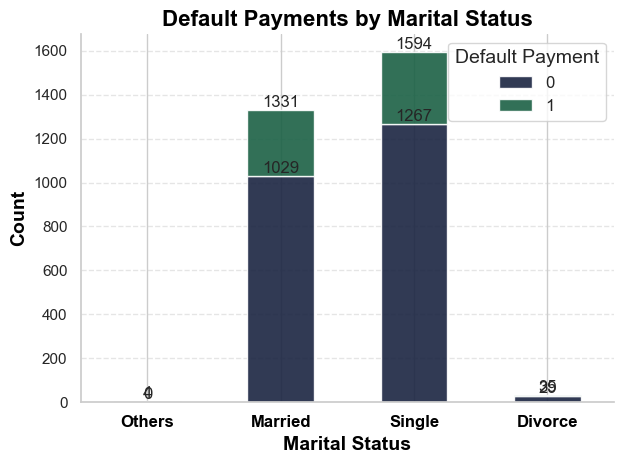

In [285]:
# Menghitung jumlah default dan non-default payment untuk setiap kombinasi 'marital_status' dan 'default_payment_next_month'
MSCount = data_visualization.groupby(['marital_status', 'default_payment_next_month']).size().unstack()

# Membuat bar plot menggunakan seaborn untuk memvisualisasikan jumlah default dan non-default payment berdasarkan 'marital_status'
plt.figure(figsize=(10, 6))
ax = MSCount.plot(kind='bar', stacked=True, alpha=0.9, color=sns.color_palette('cubehelix'))

# Menambahkan label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Menambahkan label di pinggir bar

# Mengatur judul barchart, label x, dan label y
plt.xlabel('Marital Status', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Default Payments by Marital Status', fontsize=16, fontweight='bold', color='black')

# Menambahkan bayangan pada bar chart
ax.legend(title='Default Payment', fontsize=12, title_fontsize='14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Menyesuaikan tata letak label x
plt.xticks([0, 1, 2, 3], ['Others', 'Married', 'Single', 'Divorce'], rotation=0, fontsize=12, fontweight='bold', color='black')

# Menampilkan plot dengan grid untuk menambah kejelasan
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

Based on the stacked bar chart above, it can be seen that as many as 4 out of 4 (100%) clients whose marital status is unknown were declared not in default. As for clients who are married, there are 1029 out of 1331 (77.33%) of them who do not fail to pay, and the rest fail to pay. Meanwhile, for unmarried people, 1267 out of 1594, or 79.48%, did not fail to pay, and the rest failed to pay. And 29 of the 35 divorced (82.86%) did not fail to pay, and the rest failed to pay.

### 5.4 Correlation of Numeric Column with default payment

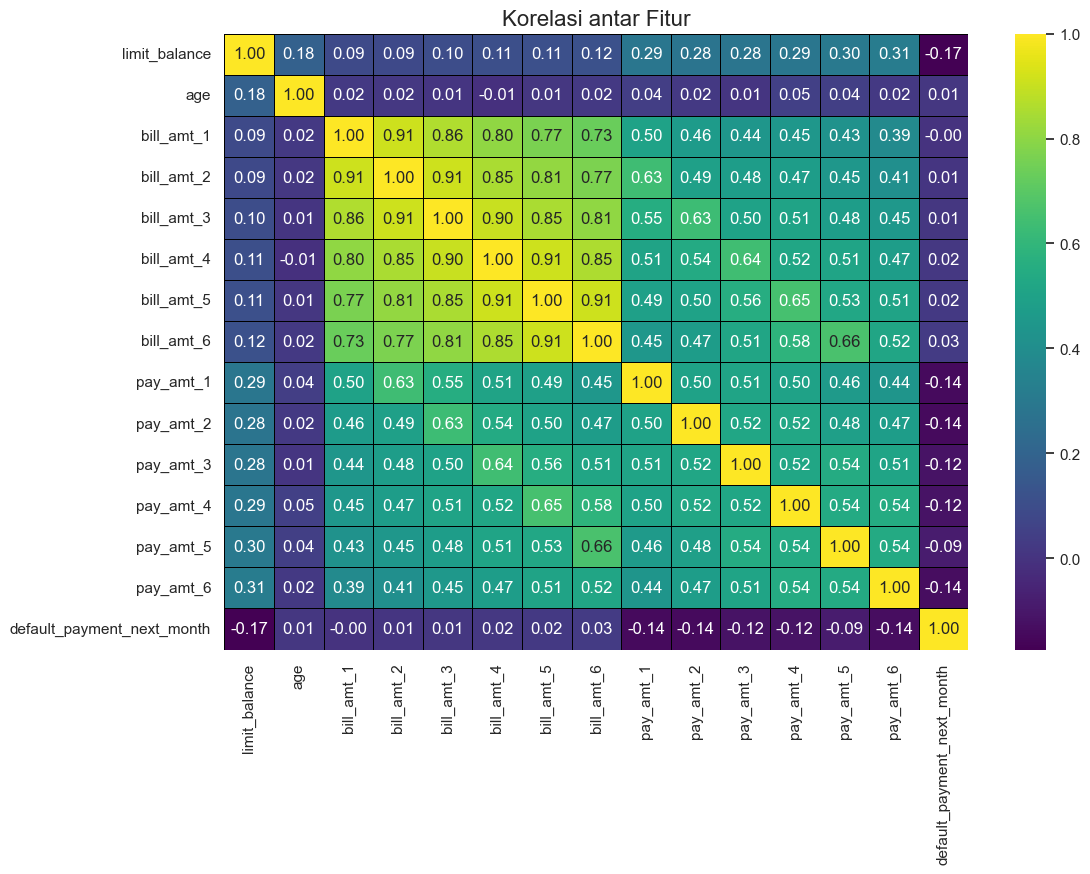

In [286]:
dfNum = data_visualization[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']]

# Membuat visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')  # Mengatur gaya plot menjadi whitegrid
heatmap = sns.heatmap(dfNum.corr(method='spearman'), annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, linecolor='black')

# Menambahkan judul pada heatmap
heatmap.set_title('Korelasi antar Fitur', fontsize=16)

# Menampilkan plot
plt.show()

Based on the correlation heatmap above, it can be seen that the limit_balance variable has the highest correlation with the default_payment variable.

## 6. Feature Engineering

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [287]:
# copy the original data set
df = data.copy()

---
### 6.1 Analyzing correlations between data

To test the correlation of data in the dataset against default_payment_next_mont, we can use the correlation test method where we will find out which target column has a correlation with which numeric and categorical columns. ***To see the correlation value between the columns***, we will use ***heatmap visualization*** and also ***statistical tests*** to get the p-value between the two columns

#### 6.1.1 Numerical

To find the correlation between the target and the numerical column , we need to first ***determine which columns fall into the numerical category*** and put them into one variable to make it easier for us to process the data.

In [1]:
# Create a list containing other numeric columns
numeric_column = ['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month']

# Create a new variable named df_numeric which contains other numeric column 
df_numeric = df[numeric_column]

NameError: name 'df' is not defined

We know that the target column we want to search for from this dataset is of the categorical type. After determining which features are of the numerical type, we will carry out a correlation test. ***Correlation that is suitable to use to determine the correlation between numerical and categorical columns is Spearman***

**Spearman:** denoted as ρ (rho), measures the monotonic relationship between variables. ***It does not assume aspecific distribution*** for the data and is ***appropriate for variables that may not have a linear relationship***. It is ***less sensitive to outliers*** and ***can capture non-linear relationships***.

In [289]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in df_numeric:
     
    corr, pval = stats.spearmanr(df[i],df['default_payment_next_month'])
    print(f"Correlation between {i} with default_payment_next_month")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between limit_balance with default_payment_next_month
Correlation Value :-0.1738755161595824
P-value :1.499398493374106e-21 -> Both columns have a correlation
Correlation between age with default_payment_next_month
Correlation Value :0.009889632704753052
P-value :0.5904364475708352
Correlation between bill_amt_1 with default_payment_next_month
Correlation Value :-0.003879340705538626
P-value :0.8327989249458443
Correlation between bill_amt_2 with default_payment_next_month
Correlation Value :0.006522213848942819
P-value :0.7226341863000998
Correlation between bill_amt_3 with default_payment_next_month
Correlation Value :0.010518494823846343
P-value :0.5670315032717582
Correlation between bill_amt_4 with default_payment_next_month
Correlation Value :0.01743890669463772
P-value :0.34257400406299565
Correlation between bill_amt_5 with default_payment_next_month
Correlation Value :0.022575949832801773
P-value :0.21917221451243882
Correlation between bill_amt_6 with default_paym

Based on the results of the Kendall Tau test for the numerical column group, several columns were found that had a correlation with the taget **default_payment_next_month** when viewed from the p-value. Columns that have a p-value < 0.05 are interpreted as having a correlation between the columns. Therefore, we can conclude that there are 7 columns that have correlation with the **'default_payment_next_month'** column, namely the **'limit_balance'**, **'pay_amt_1'**, **'pay_amt_2'**, **'pay_amt_3'**, **'pay_amt_4'**, **'pay_amt_5'** and **'pay_amt_6'** columns

#### 6.1.2 Categorical

To find the correlation between the target and the categorical column, we need to first ***determine which columns fall into the categorical category*** and put them into one variable to make it easier for us to process the data.

In [290]:
# Grouping categorical columns into one variable
categorical = ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

We know that the target column we want to search for from this dataset is of the categorical type. After determining which features are of the categorical type, we will carry out a correlation test. ***Correlation that is suitable to use to determine the correlation between two categorical columns is Kendall***

**Kendall:** denoted by τ (tau), also measures the strength of the monotonic relationship between variables. This correlation ***does not assume a specific data distribution***. It is robust against outliers and can handle non-linear relationships. ***This is usually used when dealing with categorical or ordinal variables***. The Kendall technique is used to test the correlation between the categorical column and the price column because this technique does not require a normal distribution of data. In addition, this technique is suitable for testing the correlation between targets and categorical columns.

In [291]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in categorical:
     
    corr, pval = stats.kendalltau(df[i],df['default_payment_next_month'])
    print(f"Correlation between {i} with default_payment_next_month")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between sex with default_payment_next_month
Correlation Value :-0.02162642304931005
P-value :0.23911540032389955
Correlation between education_level with default_payment_next_month
Correlation Value :0.05626508656478849
P-value :0.001246849607580103 -> Both columns have a correlation
Correlation between marital_status with default_payment_next_month
Correlation Value :-0.026438537470640195
P-value :0.14754563955548056
Correlation between pay_1 with default_payment_next_month
Correlation Value :0.3008024729505573
P-value :6.040035145851998e-71 -> Both columns have a correlation
Correlation between pay_2 with default_payment_next_month
Correlation Value :0.22901841464845465
P-value :7.265130487967078e-41 -> Both columns have a correlation
Correlation between pay_3 with default_payment_next_month
Correlation Value :0.21178014298597372
P-value :3.797869325087989e-35 -> Both columns have a correlation
Correlation between pay_4 with default_payment_next_month
Correlation Value :0

Based on the results of the Kendall Tau test for the categorical column group, several columns were found that had a correlation with the taget **default_payment_next_month** when viewed from the p-value. Columns that have a p-value < 0.05 are interpreted as having a correlation between the columns. Therefore, we can conclude that there are 7 columns that have correlation with the **'default_payment_next_month'** column, namely the **'education_level'**, **'pay_1'**, **'pay_2'**, **'pay_3'**, **'pay_4'**, **'pay_5'** and **'pay_6'** columns

#### 6.1.3 Dropping columns that have no correlation

We have carried out a correlation test between each numerical and categorical column with the 'default_payment_next_month' column. Next, we will delete the columns that have no correlation with the 'default_payment_next_month' column and leave only the columns that have a correlation with the 'default_payment_next_month' column.

In [292]:
# Select variables that have a correlation with the 'price' column
df_selection = df[['limit_balance','education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month']]
df_selection

,limit_balance,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,4,0,0,0,0,0,0,2545,2208,1336,2232,542,348,1
1,200000,4,0,0,0,0,0,0,1689,2164,2500,3480,2500,3000,0
2,20000,4,0,0,0,0,0,0,4641,1019,900,0,1500,0,1
3,260000,4,0,0,0,0,0,0,5000,5000,1137,5000,1085,5000,0
4,150000,4,0,0,0,-1,0,0,4019,146896,157436,4600,4709,5600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,3,-1,-1,-1,-2,-2,-2,2800,0,0,0,0,0,0
2961,50000,3,-1,-1,-1,-1,-2,-2,300,5880,0,0,0,0,1
2962,450000,2,-2,-2,-2,-2,-2,-2,390,780,390,390,390,390,1
2963,50000,2,-2,-2,-2,-2,-2,-2,390,390,390,390,0,780,0


In [293]:
df_selection['pay_5'].unique()

array([ 0,  2,  3,  4,  5,  6,  7, -1, -2], dtype=int64)

---
### 6.2 Cardinality Check

**Cardinality checking** is a way to **check the number of unique entities** in a data set or data structure. It helps ensure there are no duplicates in the data, understands data characteristics such as value distribution, and helps in optimizing database and query performance by estimating the number of rows to be affected.

In this dataset, we will perform a cardinality check on categorical columns

In [294]:
# set colwidth hidher
pd.set_option('display.max.colwidth', None)

cat_cols = ['education_level','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Create a looping for unique values details
listItem = []
for col in cat_cols :
    listItem.append( [col, df_selection[col].nunique(), df_selection[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,education_level,4,"[4, 1, 2, 3]"
1,pay_1,11,"[0, 2, 1, -1, -2, 3, 4, 5, 6, 7, 8]"
2,pay_2,10,"[0, -1, 2, 3, -2, 4, 1, 5, 6, 7]"
3,pay_3,9,"[0, 2, -2, 3, -1, 4, 5, 6, 7]"
4,pay_4,10,"[0, -1, 2, 3, 4, 5, 6, 7, 8, -2]"
5,pay_5,9,"[0, 2, 3, 4, 5, 6, 7, -1, -2]"
6,pay_6,8,"[0, -1, 2, 3, -2, 4, 6, 7]"


We have carried out cardinality checking on each column and from the test results, it is known that:

- **education_level :** Have 4 Unique Values

- **pay_1 :** Have 11 Unique Values

- **pay_2 :** Have 10 Unique Values

- **pay_3 :** Have 9 Unique Values

- **pay_4 :** Have 10 Unique Values

- **pay_5 :** Have 9 Unique Values

- **pay_6 :** Have 8 Unique Values

From the cardinality checking results, each column is still included in low cardinality. Therefore, we will leave these columns for further analysis

---
### 6.3 Data Splitting

To create a machine learning model, we need to divide the data into two parts, namely the one we want to predict/target (y) and the one to predict/feature (X)

In [295]:
# Define the X and y
# Separating independent variables (features) and dependent variables (targets)
X = df_selection.drop(['default_payment_next_month'], axis=1)
y = df_selection['default_payment_next_month']

Then after splitting it into features (X) and targets (y), we will separate each one again into train data (used by the model for learning) and test data (used by the model as test data). We have quite a lot of data, totaling 2964 rows, so we will increase the training data so that the model can understand the data patterns it has and can make better predictions. The data will be divided with a ***ratio of 70: 30***, where the ***train data is 70%*** of the total data and the ***test data is 30%*** of the total data. The ***random state that will be used is 22***.

**Random State** is used to set the seed used by the random number generation algorithm. When a particular seed is set, the sequence of random numbers generated will always be the same every time the code is executed with the same seed. This is beneficial in maintaining reproducibility of results, because by using the same seed, we can get the same results when we run a function that generates random numbers.

In [296]:
# Separating data into a training set (train) and a test set (test)
# With a ratio of 70:30 and seed (random_state) 22 for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=22)

# Check the size
print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")

Shape data train : (2074, 14)
Shape data test : (890, 14)


We have finished dividing the train data and test data. In other words, the ***training data has 2074 samples and 14 features***, while the ***test data has 890 samples and 14 features***. The same number of columns between the training data and the test data indicates that the two datasets have the same structure in terms of the features used for training and testing the model.

---
### 6.4 FIV Check

**Variance Inflation Factor (VIF)** is a technique to check Multicollinearity. Multicollinearity is the phenomenon when a number of the independent variables are strongly correlated. The correlation between each independent variables (features) and the dependent variable (target), must be strong. But, between independent variables must have no or little correlation. A VIF of 1 is the best you can have as this indicates that there is no multicollinearity for this variable. A VIF of higher than 5 or 10 indicates that there is a multicollinearity in your model.

In [297]:
# Perform the FIV test on each column
def calculation_VIF(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    return(vif)

# Calculates the VIF value for each variable in the combined DataFrame.
calculation_VIF(X)

,variables,VIF
0,limit_balance,2.602523
1,education_level,1.982578
2,pay_1,1.885050
3,pay_2,3.194607
4,pay_3,3.486333
5,pay_4,4.158711
6,pay_5,4.963013
7,pay_6,3.286482
8,pay_amt_1,1.436683
9,pay_amt_2,1.364907


Based on the table above, it can be seen that **each column has an FIV value below 10**, which indicates that **each feature is independent of each other**. Therefore, we can use these columns for modeling later and there are no columns that need to be removed

---
### 6.4 Handling Outlier

To deal with outliers, we will first look at the numeric column visualization to see if the numeric data has any outliers. The numeric columns in this dataset are the columns 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'education_level, 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', and 'pay_6'. However, ***the columns that will be checked are only the 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', and 'pay_amt_6' columns.***. Based on domain knowledge, ***information in the 'education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', and 'pay_6' columns contains important information and is categorical even though it is in numerical form. Therefore, these columns will not be handled with outlier handling.

First, We will use box plots to visualize the distribution of numerical data (columns 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', and 'pay_amt_6'). This is done to see the actual information from the column so that we can find out whether there are outliers in the column

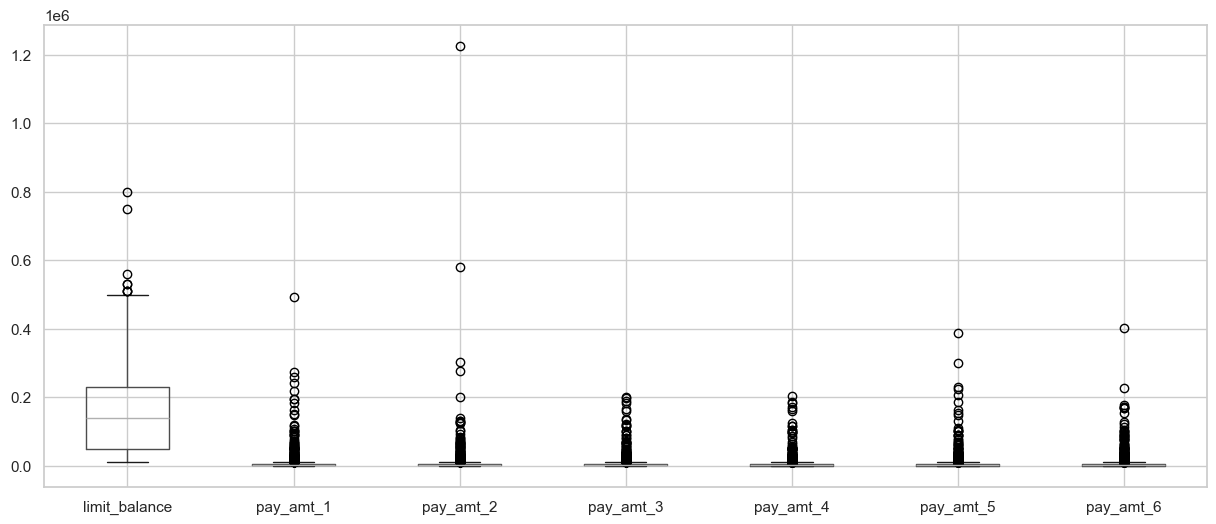

In [298]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 6))
X_train[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].boxplot()
plt.show()

From the visualization above, we can see that there are outliers in the all numeric column. Apart from looking at the visualization, we will ensure there are outliers based on the distribution. We will make calculations to find out the distribution of the columns

In [299]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the column
    for col in data.columns:
        col_name.append(col)

        # Calculate Skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly Skewed Upper and Lower Boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderatly Skewed
        elif skew_val > 0.5 or skew_val < -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normal Distribution
        else :
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))
    
    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result


After making calculations to find out the distribution of data in the column, we will use these calculations in the 'limit balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' column to find out the distribution

In [300]:
# Select the data except categorical and target columns
outlier_check = X_train[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,limit_balance,0.964663,500000.00,-220000.0,True
1,pay_amt_1,12.064465,17274.00,-11198.5,True
2,pay_amt_2,27.413478,17000.00,-11000.0,True
3,pay_amt_3,8.015938,16900.00,-11800.0,True
4,pay_amt_4,8.809402,15032.75,-10687.0,True
5,pay_amt_5,11.438712,15446.00,-10902.0,True
6,pay_amt_6,10.490434,15410.00,-11207.5,True


By looking at the visualization images and statistical calculations, we can confirm that the 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6' column contains outliers. Because the skewness value is more than 0.5, which means the data distribution is not normal, ***the method used is the capping method using the Interquartile Range (IQR)***. To overcome outliers in the data, we will use the winsorizer technique.

**Winsorizer** is a technique in statistics that is used to ***overcome outliers in data by replacing extreme values with less extreme values***, namely by using values that lie at certain percentiles of the data distribution. ***We use winsorizer because outliers in the data can significantly impact statistical analysis and model results***.

In [301]:
# Capping the skewed distribution
winsoriser_fare = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['limit_balance', 'pay_amt_1', 'pay_amt_2', 
                                                                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6'])

X_train = winsoriser_fare.fit_transform(X_train)

After capping the data, We will use a box plot to visualize again the distribution of the numerical data (column 'limit_balance''pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6'). This is done to see information from this column so that we can find out the data distribution after capping

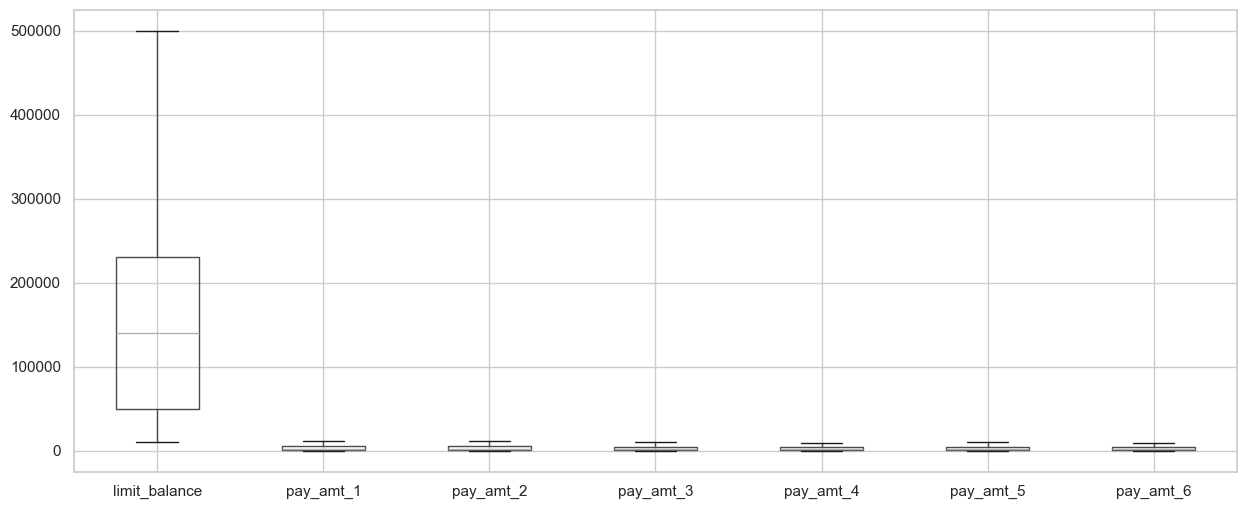

In [302]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 6))
X_train[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].boxplot()
plt.show()

Based on the boxplot above, it can be seen that there are no outliers in the numeric feature.

---
### 6.5 Feature Scalling

In [303]:
# Menyiapkan daftar kolom yang akan dihandle untuk proses scaling
column_scalling = ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Membuat preprocessor dengan menggunakan make_column_transformer
# Kolom-kolom dalam data_kolom_handling_scaling akan diubah menggunakan RobustScaler
# remainder="passthrough" mengizinkan kolom lainnya untuk tetap tidak berubah
preprocessor = make_column_transformer((RobustScaler(), column_scalling), remainder="passthrough")

## 7. Model Definition

Here are the models that will be used:

1. **Logistic Regression**:
   - Logistic Regression is a method in statistics that is used to model the relationship between one or more independent variables (predictors) and a categorical dependent variable (target) that is binary in nature.

2. **Support Vector Machine (SVM)**:
   - SVM is a powerful algorithm that finds a hyperplane in the feature space to maximize the margin between different classes, making it effective in separating non-linearly separable data.

3. **K-Nearest Neighbors (KNN)**:
   - KNN is a simple yet effective classification algorithm that classifies data points based on the majority class among their k-nearest neighbors in the feature space.

In [304]:
# Define the Logistic Regression Classifier with a random state
logreg_model = LogisticRegression(random_state=22)

# Define the Support Vector Machine (SVM) Classifier with a random state
svm_model = SVC(random_state=42)

# Define the K-Nearest Neighbors (KNN) Classifier with a random state
knn_model = KNeighborsClassifier()

We will immediately use the pipeline to make it easier for us to use these three models.

### 7.1 Logistic Regression Pipeline

In [305]:
# Create a pipeline with two steps: preprocessing and Logistic Regression
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression(random_state=22))

# Displays the steps in the pipeline
print('Pipeline steps : ', logreg_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('robustscaler', RobustScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])), ('logisticregression', LogisticRegression(random_state=22))]


### 7.2 SVM Pipeline

In [306]:
# Create a pipeline with two steps: preprocessing and Support Vector Machine (SVM)
svm_pipeline = make_pipeline(preprocessor, SVC(random_state=22))

# Displays the steps in the pipeline
print('Pipeline steps : ', svm_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('robustscaler', RobustScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])), ('svc', SVC(random_state=22))]


### 7.3 KKN (K-Nearest Neighbors) Pipelne

In [307]:
# Create a pipeline with two steps: preprocessing and K-Nearest Neighbors (KNN)
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

# Displays the steps in the pipeline
print('Pipeline steps : ', knn_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('robustscaler', RobustScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])), ('kneighborsclassifier', KNeighborsClassifier())]


## 8. Model Training

At this stage we will carry out model training for the models we have chosen.

### 8.1 Logistic Regression Pipeline Training

In [308]:
# Involves model training in the Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('logisticregression', LogisticRegression(random_state=22))])

### 8.2 SVM Pipeline Training

In [309]:
# Melibatkan model training pada pipeline Support Vector Machine (SVM)
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('svc', SVC(random_state=22))])

### 8.3 KNN Pipeline Training

In [310]:
# Melibatkan model training pada pipeline K-Nearest Neighbors (KNN)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## 9. Model Evaluation

To evaluate a classification model, it can be done by looking at the accuracy, precision, recall or f1 score values.

1. Accuracy 
    - Accuracy is a value that shows how much of the data is predicted correctly by the model. The higher the accuracy value (closer to 100%), the better the model formed. However, accuracy is not suitable for imbalanced data, because it will produce wrong interpretations.
2. Precision 
    - Precision shows the percentage of data that is predicted correctly from all positive data. Precision is suitable for use when you want to minimize False Positives (data that is predicted to be positive, but is actually negative).
3. Recall 
    - Recall is a value that shows how much of the predicted data is true positive out of the total data that is true positive. Recall is suitable for use when you want to minimize False Negatives (data that is predicted to be negative, but is actually positive).
4. F1-Score 
    - F1-Score is the harmonic mean of precision and recall. A high F1-Score indicates that the classification model has good precision and recall.

To predict whether someone will default or not, you can look at the recall/f1-score value in the 'default' class (1).

### 9.1 Pipeline Base Model Evaluation

#### 9.1.1. Logistic Regression Pipeline Base Model Eval

In [311]:
# Check Performance Model against Train-Set and Test-Set
# Melakukan prediksi pada dataset pelatihan menggunakan model Logistic Regression
logreg_pipeline_predict_train = logreg_pipeline.predict(X_train)

# Melakukan prediksi pada dataset uji menggunakan model Logistic Regression
logreg_pipeline_predict_test = logreg_pipeline.predict(X_test)

# Menampilkan F1 Score pada dataset pelatihan
print('F1 Score - Train Set  : ', f1_score(y_train, logreg_pipeline_predict_train), '\n')

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report : \n', classification_report(y_train, logreg_pipeline_predict_train), '\n')

# Menampilkan F1 Score pada dataset uji
print('F1 Score - Test Set  : ', f1_score(y_test, logreg_pipeline_predict_test), '\n')

# Menampilkan Classification Report pada dataset uji
print('Classification Report : \n', classification_report(y_test, logreg_pipeline_predict_test), '\n')

F1 Score - Train Set  :  0.39065108514190316 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1635
           1       0.73      0.27      0.39       439

    accuracy                           0.82      2074
   macro avg       0.78      0.62      0.64      2074
weighted avg       0.81      0.82      0.79      2074
 

F1 Score - Test Set  :  0.4326241134751773 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       694
           1       0.71      0.31      0.43       196

    accuracy                           0.82       890
   macro avg       0.77      0.64      0.66       890
weighted avg       0.81      0.82      0.79       890
 



Based on the results of the model evaluation using Logistic Regression above, we can conclude that:

1. **Accuracy Level**
    - The model has a high level of accuracy in predicting class 0 (no payment default) in both train and test datasets, but is less accurate in predicting class 1 (payment failure).

2. **Recall**
    - The model has low recall for class 1 (payment default), indicating a tendency to miss many default cases.

3. **F1-Score**
    - The F1 score for class 1 (default) is also relatively low in both train and test datasets, indicating that the balance between precision and recall for this class is not optimal.

4. **Model Consistency**
    - The model shows consistent performance between train and test data, indicated by small differences between evaluations on both datasets.

#### 9.1.2. SVM Pipeline Base Model Evaluation

In [312]:
# Check Performance Model against Train-Set and Test-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
svm_pipeline_predict_train = svm_pipeline.predict(X_train)

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
svm_pipeline_predict_test = svm_pipeline.predict(X_test)

# Menampilkan F1 Score pada dataset pelatihan
print('F1 Score - Train Set  : ', f1_score(y_train, svm_pipeline_predict_train), '\n')

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report : \n', classification_report(y_train, svm_pipeline_predict_train), '\n')

# Menampilkan F1 Score pada dataset uji
print('F1 Score - Test Set  : ', f1_score(y_test, svm_pipeline_predict_test), '\n')

# Menampilkan Classification Report pada dataset uji
print('Classification Report : \n', classification_report(y_test, svm_pipeline_predict_test), '\n')

F1 Score - Train Set  :  0.5272459499263623 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1635
           1       0.75      0.41      0.53       439

    accuracy                           0.85      2074
   macro avg       0.80      0.69      0.72      2074
weighted avg       0.83      0.85      0.83      2074
 

F1 Score - Test Set  :  0.49829351535836175 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       694
           1       0.75      0.37      0.50       196

    accuracy                           0.83       890
   macro avg       0.80      0.67      0.70       890
weighted avg       0.82      0.83      0.81       890
 



Based on the results of the model evaluation using SVM above, we can conclude that:

1. **F1-Score**
    - The F1-Score for train data is 0.53, while for test data it is 0.50. Even though the F1-Score on the train data is slightly higher, both show that the model has a fairly good balance between precision and recall in predicting both classes.
2. **Recall**
    - Recall for class 1 in the train data is 0.41, while in the test data it is 0.37. Although the recall rate for default cases is not very high, the model tends not to miss a large number of default cases.
3. **Accuracy Level**
    - The overall accuracy level on the train data is 0.85, while on the test data it is 0.83. Even though there was a slight decrease in performance on the test data, the model was still able to provide predictions with a relatively high level of accuracy.
4. **Model Consistency**
    - There is consistency in model performance between train and test data, with insignificant differences between evaluations on both datasets.

#### 9.1.3. KNN Pipeline Base Model Evaluation

In [313]:
# Check Performance Model against Train-Set and Test-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model K-Nearest Neighbors (KNN)
knn_pipeline_predict_train = knn_pipeline.predict(X_train)

# Melakukan prediksi pada dataset uji menggunakan model K-Nearest Neighbors (KNN)
knn_pipeline_predict_test = knn_pipeline.predict(X_test)

# Menampilkan F1 Score pada dataset pelatihan
print('F1 Score - Train Set  : ', f1_score(y_train, knn_pipeline_predict_train), '\n')

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report : \n', classification_report(y_train, knn_pipeline_predict_train), '\n')

# Menampilkan F1 Score pada dataset uji
print('F1 Score - Test Set  : ', f1_score(y_test, knn_pipeline_predict_test), '\n')

# Menampilkan Classification Report pada dataset uji
print('Classification Report : \n', classification_report(y_test, knn_pipeline_predict_test), '\n')

F1 Score - Train Set  :  0.602510460251046 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1635
           1       0.78      0.49      0.60       439

    accuracy                           0.86      2074
   macro avg       0.83      0.73      0.76      2074
weighted avg       0.85      0.86      0.85      2074
 

F1 Score - Test Set  :  0.4634920634920635 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       694
           1       0.61      0.37      0.46       196

    accuracy                           0.81       890
   macro avg       0.73      0.65      0.67       890
weighted avg       0.79      0.81      0.79       890
 



Based on the results of the model evaluation using KNN above, we can conclude that:

1. **F1-Score**
    - The F1-Score for train data is 0.60, while for test data it is 0.46. This shows that the model has better performance in predicting classes on train data than on test data, with a significant difference between the two.
2. **Recall**
    - Recall for class 1 in the train data is 0.49, while in the test data it is 0.37. Although the recall rate for default cases is not very high, the model tends not to miss a large number of default cases, but the recall value decreases significantly in the test data.
3. **Level of Accuracy**
    - The overall accuracy level on the train data is 0.86, while on the test data it is 0.81. Even though it is still quite high, there is a decrease in performance on test data compared to train data.
4. **Model Consistency**
    - There is a considerable difference in model performance between train and test data, with the model tending to produce better results on train data than on test data. This indicates possible overfitting in the model.

#### 9.1.4 Pipeline Base Model Evaluation Conclusion

Based on the evaluation of these three models, the **SVM model has the best performance compared to Logistic Regression and KNN**, with a higher F1-Score and a better balance between precision and recall on test data.

### 9.2 Cross Validation

#### 9.2.1 Logistic Regression Cross Validation

In [314]:
logreg_crossVal = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='f1')

print('F1-Score Cross Validation  : ', logreg_crossVal)
print('Mean F1-Score Cross Validation : ', logreg_crossVal.mean())
print('Std F1-Score Cross Validation  : ', logreg_crossVal.std())

F1-Score Cross Validation  :  [0.4496124  0.35483871 0.37288136 0.27777778 0.38016529]
Mean F1-Score Cross Validation :  0.3670551071488748
Std F1-Score Cross Validation  :  0.0550294667818579


Based on the cross-validation results, the model shows significant performance variations between folds with **F1-Score values varying from 0.28 to 0.45**. Although the average F1-Score from cross-validation is 0.37, the standard deviation is quite high (0.055) indicating that **the model performance tends to be unstable between folds**. This indicates that **the model may be inconsistent in making predictions on different datasets**, and further adjustments or improvements need to be made to improve the stability and overall performance of the model.

#### 9.2.2 SVM Cross Validation

In [315]:
svm_crossVal = cross_val_score(svm_pipeline, X_train, y_train, cv=5, scoring='f1')

print('F1-Score Cross Validation  : ', svm_crossVal)
print('Mean F1-Score Cross Validation : ', svm_crossVal.mean())
print('Std F1-Score Cross Validation  : ', svm_crossVal.std())

F1-Score Cross Validation  :  [0.4375     0.48611111 0.54285714 0.432      0.46616541]
Mean F1-Score Cross Validation :  0.47292673350041764
Std F1-Score Cross Validation  :  0.04009951714171841


From the cross-validation results, the **model shows varying performance between each fold with an F1-Score ranging from 0.43 to 0.54**. The average F1-Score from cross-validation is 0.47, which shows the **overall performance of the model in predicting with balance between precision and recall**. The relatively low standard deviation (0.04) indicates that **the model performance is quite stable between folds**. Thus, this model has good performance and is relatively stable in making predictions on unseen data.

#### 9.2.3 KNN  Cross Validation

In [316]:
knn_crossVal = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='f1')

print('F1-Score Cross Validation  : ', knn_crossVal)
print('Mean F1-Score Cross Validation : ', knn_crossVal.mean())
print('Std F1-Score Cross Validation  : ', knn_crossVal.std())

F1-Score Cross Validation  :  [0.49655172 0.44295302 0.52287582 0.44776119 0.46153846]
Mean F1-Score Cross Validation :  0.47433604336678714
Std F1-Score Cross Validation  :  0.030674226839492814


From the cross-validation results, the model shows **varying performance between each fold with an F1-Score ranging from 0.44 to 0.52**. The average F1-Score from cross-validation is 0.47, which shows the **overall performance of the model in predicting with balance between precision and recall**. The relatively low standard deviation (0.03) indicates that the model performance is quite stable between folds. Thus, this **model has good performance and is relatively stable in making predictions on unseen data.**

#### 9.2.4 Cross Validation Model Evaluation Conclusion

Based on the cross-validation results, the algorithm that has the highest average F1-Score is K-Nearest Neighbors (KNN) with a value of 0.47433604336678714, followed by Support Vector Machine (SVM) with a value of 0.47292673350041764, and Logistic Regression with a value of 0.3670551071488748. KNN also had the lowest standard deviation, indicating better stability in prediction performance between folds. However, the F1-Score value between KNN and SVM is not much different. Apart from that, when testing the base model using SVM the resulting values are also better. Therefore, we will use SVM because the evaluation model value on the base is more considered because it includes test data

### 9.3 Hyperparameter Tuning

**Hyperparameter tuning** is the process of optimizing previously determined values (hyperparameters) in a machine learning model to achieve better performance. **Hyperparameters** are parameters that a model cannot learn during training, and choosing the right values for hyperparameters can result in a more accurate and efficient model. By performing hyperparameter tuning, we can improve the model's ability to make better predictions, reduce overfitting or underfitting, and improve overall performance.

Next, we will start by defining hyperparameters. We will use Grid Search Cross Validation because it guarantees thorough exploration of the hyperparameter space.

In [317]:
# Define Hyperparameter 
params_svm = {
    'kernel':['rbf'],
    'degree':[2, 3],
    'C':[0.1, 1, 10, 100],
    'gamma':[0.1, 'scale'],
    'class_weight':['balanced']}

grid_svm = GridSearchCV(estimator=svm_model, param_grid=params_svm, cv=3, n_jobs=-1, verbose=10, scoring='f1')
grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'degree': [2, 3], 'gamma': [0.1, 'scale'],
                         'kernel': ['rbf']},
             scoring='f1', verbose=10)

In [318]:
# Get the best parameters from GridSearchCV results
best_params = grid_svm.best_params_

# Displays the best parameters
best_params

{'C': 100,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [319]:
# Create a new Pipeline with the best parameters from the GridSearch results
# Get the best model from GridSearchCV results
best_estimator = grid_svm.best_estimator_

# Displays the best models
best_estimator

SVC(C=100, class_weight='balanced', degree=2, random_state=42)

In [320]:
# Check Model Performance against Train-Set
# Perform predictions on the training dataset using the best model
best_estimator_predict_train = best_estimator.predict(X_train)
best_estimator_predict_test = best_estimator.predict(X_test)

# Displays the F1 Score on the training dataset
print('F1 Score - Train Set : ', f1_score(y_train, best_estimator_predict_train), '\n')
print('F1 Score - Test Set : ', f1_score(y_test, best_estimator_predict_test), '\n')

# Displays a Classification Report on the training dataset
print('Classification Report : \n', classification_report(y_train, best_estimator_predict_train), '\n')
print('Classification Report : \n', classification_report(y_test, best_estimator_predict_test), '\n')

F1 Score - Train Set :  0.3991989319092123 

F1 Score - Test Set :  0.397456279809221 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.54      0.66      1635
           1       0.28      0.68      0.40       439

    accuracy                           0.57      2074
   macro avg       0.57      0.61      0.53      2074
weighted avg       0.74      0.57      0.61      2074
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.56      0.67       694
           1       0.29      0.64      0.40       196

    accuracy                           0.57       890
   macro avg       0.57      0.60      0.53       890
weighted avg       0.72      0.57      0.61       890
 



After performing hyperparameter tuning, we can conclude that:
- model performance decreased drastically with the F1-Score on the test data being 0.40.
- Although the recall value for class 1 increased, the precision decreased significantly, indicating a tendency to classify more cases as false positives.
- The parameters used for tuning are {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}, but the results did not succeed in improving model performance significantly.
- Even though the f1-score value in training and testing after tuning is smaller than the f-1 score value before hyperparameter tuning, the f-1 score value is more stable after hyperparameter tuning. The f-1 score value in the test and training data is at 0.40.

## 10. Model Saving

In [321]:
# Menyimpan model Logistic Regression ke dalam file pickle
with open('model.pkl', 'wb') as file_5:
  pickle.dump(best_estimator, file_5)

## 11. Model Inference

Inference Model is in Credit_Card_Default_Prediction_Inference

## 12. Conclusion

The dataset we have is clean data where no missing values were found. We find that there are **24 columns with 2,965 data entries.** The majority of the data in this dataset has a non-normal distribution.

The majority of borrowers are those who have a bachelor's degree, followed by master's and doctoral graduates, and followed by high school graduates. We find that 78.58% of people registered in our dataset are categorized as safe from default payments/NOT defaulting.

From the results of the correlation test, we find that data such as **limit_balance, education_level, and pay_amt** have a very low correlation. Likewise with Multicollinearity, we find a **high correlation between independent variables in the bill_amt data** and it will continue to be used for the same reason.

From the entire model test we find that **we will predict the default payment classification using the SVM model without Hyperparameter Tuning improvements.** Compared to the Logistic Regression and KNN methods, the SVM model has much better results in terms of prediction, accuracy and fitting. SVM gets less extreme fitting results.